In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(header=None,filepath_or_buffer='ratings_Electronics.csv')

In [3]:
data.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
data=data.rename(columns={0:'UserId',1:'ProductId',2:'Rating',3:'Timestamp'})

In [5]:
data=data.drop(columns=['Timestamp'],axis=1)

In [6]:
data.head()

,UserId,ProductId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [7]:
data.isna().sum()

UserId       0
ProductId    0
Rating       0
dtype: int64

In [8]:
df_frequency_map = data.UserId.value_counts().to_dict()
data['Ratings_Count'] = data['UserId'].map(df_frequency_map)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
UserId           object
ProductId        object
Rating           float64
Ratings_Count    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [10]:
data_filtered=data[data['Ratings_Count']>49]

Reducing the sparsity.

In [11]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 4 columns):
UserId           125871 non-null object
ProductId        125871 non-null object
Rating           125871 non-null float64
Ratings_Count    125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


In [12]:
import seaborn as sns

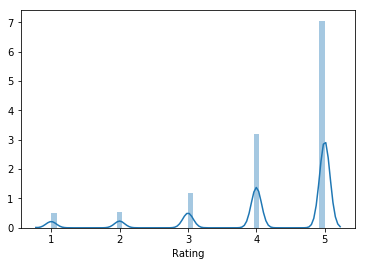

In [13]:
sns.distplot(data_filtered['Rating'],kde=True)

It is a right skewed distribution for rating as more number of people have given rating 5.

In [71]:
populparProduct=data_filtered.groupby('ProductId')['Rating'].count().sort_values(ascending=False)

In [72]:
meanRatingsDesc=data_filtered.groupby('ProductId')['Rating'].mean().sort_values(ascending=False)

In [73]:
populparProduct

ProductId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
             ... 
B004AB1OS2      1
B004AB02IA      1
B004AAZXQM      1
B004AAPKTW      1
0594451647      1
Name: Rating, Length: 48190, dtype: int64

In [74]:
meanRatingsDesc

ProductId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
             ... 
B000VJ0YQ0    1.0
B000MVEBOS    1.0
B000C0OF54    1.0
B005YXXT7Y    1.0
B0080REM4A    1.0
Name: Rating, Length: 48190, dtype: float64

Here we can see the mean values of rating of the products and the number of times a products is purchased displayed in the descending order.

Displaying the most popular products.

In [15]:
crosstabMatrix = pd.crosstab(data_filtered.UserId, data_filtered.ProductId).astype('int')

In [18]:
crosstabMatrix.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100WO06OQR8BQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A105S56ODHGJEK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A105TOJ6LTVMBG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10AFVU66A79Y1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader

We choose here to go by item based collaborative filtering

In [35]:
reader = Reader(rating_scale=(1, 5))

In [36]:
dataSurp = Dataset.load_from_df(data_filtered[['UserId', 'ProductId', 'Rating']], reader)

In [38]:
trainset, testset = train_test_split(dataSurp, test_size=.30)

In [41]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [42]:
test_pred = algo.test(testset)

In [45]:
print("Item-based Colaborative Filtering Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Colaborative Filtering Model : Test Set
RMSE: 1.1334


1.1333812340335698

In [94]:
def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [54]:
top_n_for_item_based = get_top_n(test_pred, 5)

In [55]:
for uid, user_ratings in top_n_for_item_based.items():
    print(uid, [iid for (iid, _) in user_ratings])

AQ2FC1DLKVD8H ['B0040723AO', 'B0013FRNKG', 'B00E1GGE40', 'B00AR95EVE', 'B00JTU88Y2']
AG5WSXI52FPKH ['B00139VKV0', 'B0012JCYPC', 'B000V0GXR8', 'B001FA1NZK', 'B000NUYW92']
A51OFQVC6O5YL ['B0045JNA18', 'B007SZ0EOW', 'B002BH3Z8E', 'B0043WJRRS', 'B005CT56F8']
AMS2CPERWN7JV ['B009EPSJXM', 'B00JFAA97A', 'B0064X5Q5Q', 'B00AR95EVE', 'B00F3F0EIU']
AZ8XSDMIX04VJ ['B002V88HFE', 'B0047T79M2', 'B007WTAJTO', 'B000BMAQAQ', 'B000QUUFRW']
A15TABNGK6L4N3 ['B00723KZTY', 'B00005T3G0', 'B000WL6YY8', 'B004CRSM4I', 'B000VZS2EU']
A3QNQQKJTL76H0 ['B009BZX340', 'B000HPZ97W', 'B002O0KOWI', 'B002TMRZOQ', 'B00BEWF4R2']
A2BX8DDQGCCG2J ['B005FYNSPK', 'B0047T79M2', 'B005EOWBKE', 'B003T5KXJQ', 'B00A83I8G2']
A3SL0HA6422W4M ['B00A39PPCG', 'B00A34TU7W', 'B004QMH8KI', 'B0091TA5EW', 'B00HWCYOK6']
A2J4XMWKR8PPD0 ['B00A1D8Z1M', 'B008TTCJOY', 'B008D6KZHQ', 'B00A1D8ZA8', 'B00908BMVE']
A11FX8HL2ANK6T ['B002SSK9VW', 'B0045EPIG8', 'B00006JPWW', 'B004G6002M', 'B003VANOI6']
A14X244VGHWPSX ['B007W0XHK6', 'B000MP831G', 'B00009W3BQ', '

Here I have found out the top 5 best products for ever user according to the pearson correlation as the distance metric between respective product vectors since it an item item based colaborative filtering. Have used KNN for the same instead of using matrix factorisation as it was taking a lot of time for the computations. The RMSE score is good enough which permits us to use this method. We can also drive some insight from the popularity based method but it doesnt take into account the specific selection bias of each user and treats the products on a global level but it can give us some insights about the most famous and liked products out of the lot. So it can serve as a good model to suggest new items for the user alongside combining it with item based colaborative filtering.